The task is to cluster data by two clusters without classificators. Whether patient will return to the hospital or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('TRAIN.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted_NO
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,1
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,1
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71231,Caucasian,Female,[30-40),?,2,1,1,5,HM,?,48,0,13,1,1,0,337,788,599,9,None,None,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
71232,Caucasian,Female,[70-80),?,3,6,1,6,MC,Family/GeneralPractice,30,1,22,0,0,0,250.8,707,681,9,None,None,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Ch,Yes,0
71233,Caucasian,Female,[40-50),?,1,1,7,4,MD,Emergency/Trauma,63,0,9,1,2,0,250.8,780,272,9,None,>8,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
71234,Caucasian,Male,[70-80),?,2,11,7,3,MC,Emergency/Trauma,55,4,14,0,2,1,427,518,799,9,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1


In [6]:
data.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_NO
count,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000
mean,2.152297,3.997235,5.881745,4.491479,43.129934,1.344601,15.719987,0.300747,0.157982,0.614605,7.147285,0.524973
std,1.546621,5.686334,4.426288,3.038481,19.006543,1.681742,8.174863,1.112868,0.697619,1.228058,1.991019,0.499379
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,2.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000,1.000000
75%,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,8.000000,28.000000,22.000000,14.000000,129.000000,6.000000,81.000000,42.000000,42.000000,21.000000,9.000000,1.000000


In [7]:
data.groupby('admission_type_id').median()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_NO
admission_type_id,,,,,,,,,,,
1,1.0,7.0,4.0,48.0,0.0,14.0,0.0,0.0,0.0,8.0,1.0
2,1.0,1.0,4.0,41.0,1.0,13.0,0.0,0.0,0.0,8.0,1.0
3,1.0,1.0,4.0,36.0,2.0,17.0,0.0,0.0,0.0,7.0,1.0
4,1.0,4.0,3.0,46.0,1.0,13.0,0.0,0.0,0.0,7.0,1.0
5,3.0,17.0,3.0,22.0,0.0,15.0,0.0,0.0,0.0,8.0,1.0
6,1.0,17.0,4.0,52.0,1.0,15.0,0.0,0.0,0.0,7.0,0.0
7,4.5,7.0,5.0,48.0,3.0,22.0,0.0,0.0,0.0,9.0,1.0
8,1.0,1.0,2.0,45.0,2.0,16.0,0.0,0.0,0.0,5.0,1.0


In [8]:
data.groupby('discharge_disposition_id').median()

,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_NO
discharge_disposition_id,,,,,,,,,,,
1,1.0,7.0,3.0,44.0,1.0,13.0,0.0,0.0,0.0,7.0,1.0
2,2.0,7.0,3.0,45.0,1.0,14.0,0.0,0.0,0.0,8.0,0.0
3,1.0,7.0,5.0,45.0,1.0,17.0,0.0,0.0,0.0,9.0,0.0
4,1.0,7.0,5.0,45.0,0.0,14.0,0.0,0.0,0.0,9.0,1.0
5,2.0,7.0,5.0,47.0,1.0,15.0,0.0,0.0,0.0,8.0,0.0
6,2.0,7.0,5.0,44.0,1.0,17.0,0.0,0.0,0.0,9.0,0.0
7,1.0,7.0,2.0,47.0,0.0,11.0,0.0,0.0,0.0,7.0,1.0
8,2.0,7.0,6.0,48.0,2.0,18.0,0.0,0.0,0.0,8.0,1.0
9,3.0,1.0,4.0,46.0,1.0,12.0,0.0,0.0,0.0,8.0,1.0


In [9]:
data.groupby('admission_source_id').median()

,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_NO
admission_source_id,,,,,,,,,,,
1,3.0,1.0,4.0,39.0,1.0,15.0,0.0,0.0,0.0,7.0,1.0
2,2.0,1.0,4.0,42.0,2.0,16.0,0.0,0.0,0.0,8.0,1.0
3,3.0,6.0,4.0,41.0,1.0,17.0,0.0,0.0,0.0,6.0,1.0
4,2.0,1.0,5.0,40.0,2.0,15.0,0.0,0.0,0.0,8.0,1.0
5,1.0,3.0,5.0,45.0,1.0,16.0,0.0,0.0,0.0,9.0,1.0
6,1.0,1.0,4.0,50.0,0.0,12.0,0.0,0.0,0.0,5.0,1.0
7,1.0,1.0,4.0,48.0,0.0,14.0,0.0,0.0,0.0,8.0,0.0
8,2.0,1.0,3.0,22.5,0.0,15.0,0.0,0.0,0.0,5.5,1.0
9,2.0,1.0,3.0,50.0,0.0,11.0,0.0,0.0,0.0,5.0,1.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71236 non-null  object
 1   gender                    71236 non-null  object
 2   age                       71236 non-null  object
 3   weight                    71236 non-null  object
 4   admission_type_id         71236 non-null  int64 
 5   discharge_disposition_id  71236 non-null  int64 
 6   admission_source_id       71236 non-null  int64 
 7   time_in_hospital          71236 non-null  int64 
 8   payer_code                71236 non-null  object
 9   medical_specialty         71236 non-null  object
 10  num_lab_procedures        71236 non-null  int64 
 11  num_procedures            71236 non-null  int64 
 12  num_medications           71236 non-null  int64 
 13  number_outpatient         71236 non-null  int64 
 14  number_emergency      

In [6]:
data[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']] = data[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].astype('object')

In [218]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [219]:
regress_col = X.loc[:, X.dtypes != object].columns

In [220]:
X_true = X.loc[y == 1]
X_false = X.loc[y == 0]

C:\Users\Albert\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


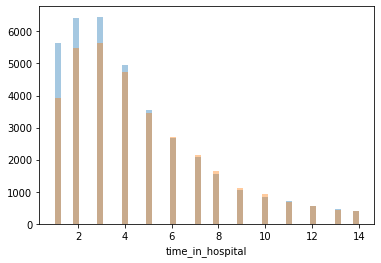

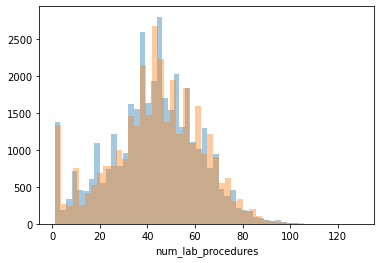

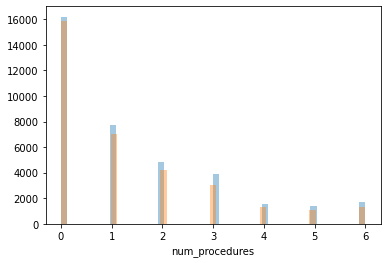

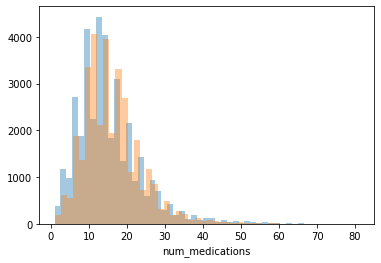

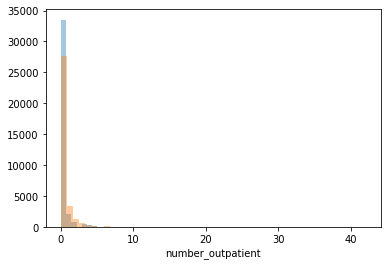

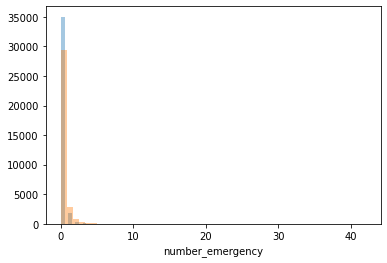

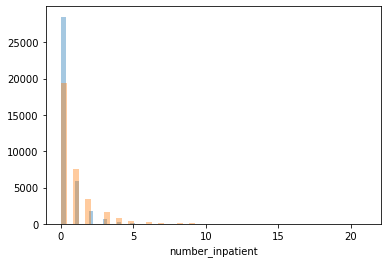

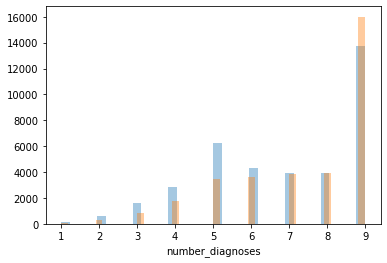

In [208]:
for col in regress_col:
    if X[col].dtype != object:
        sns.distplot(X_true[col], kde=False)
        sns.distplot(X_false[col], kde=False)
#         plt.xlim(0, 20)
        plt.show()

'time_in_hospital' 'number_diagnoses' and 'number_inpatient' are predictive

In [221]:
X = pd.get_dummies(X, drop_first=False)

In [222]:
X.isna().sum().sum()

0

In [223]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
transformer = PowerTransformer()
scaler = StandardScaler()

# X[regress_col] = transformer.fit_transform(X[regress_col])
X[regress_col] = scaler.fit_transform(X[regress_col])

In [ ]:
# imputer = SimpleImputer(missing_values='?', strategy='most_frequent')
# X= pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

In [224]:
X_true = X.loc[y == 1]
X_false = X.loc[y == 0]

In [30]:
import seaborn as sns

In [75]:
len(regress_col)

8

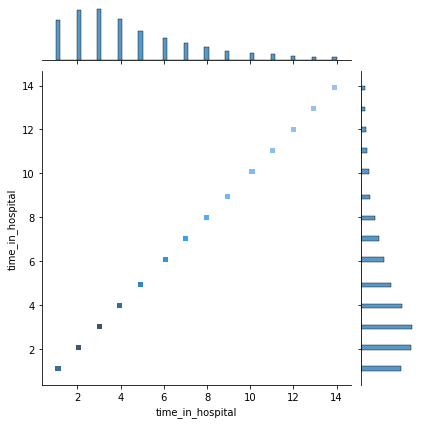

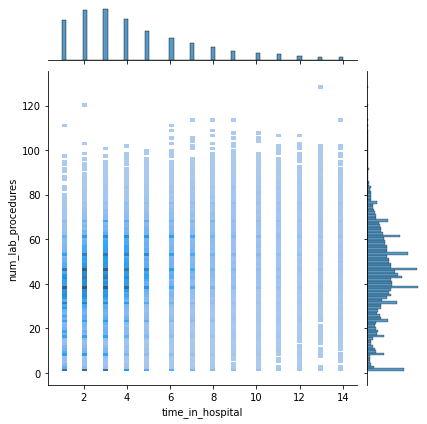

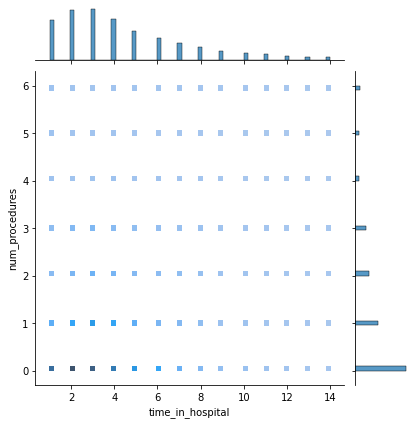

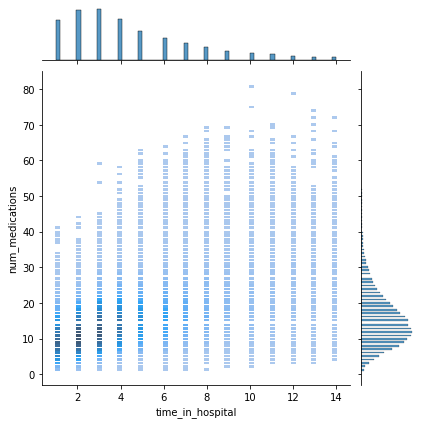

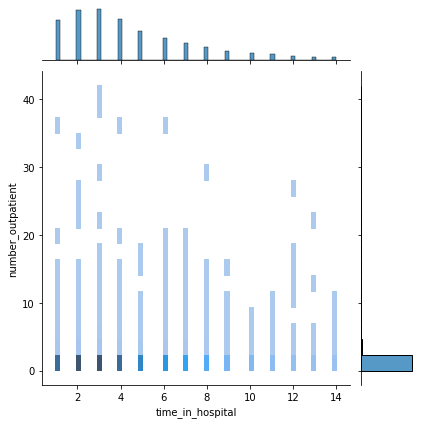

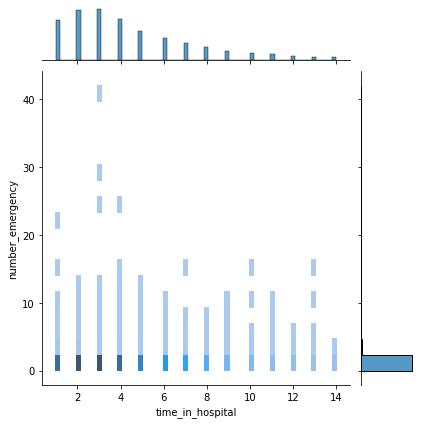

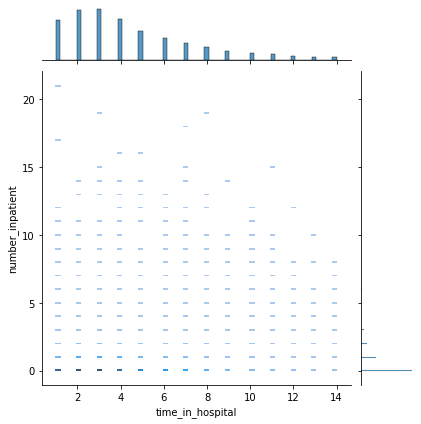

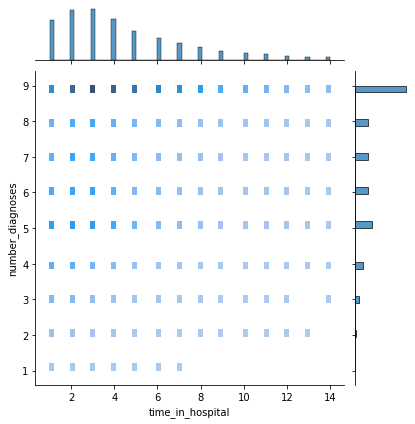

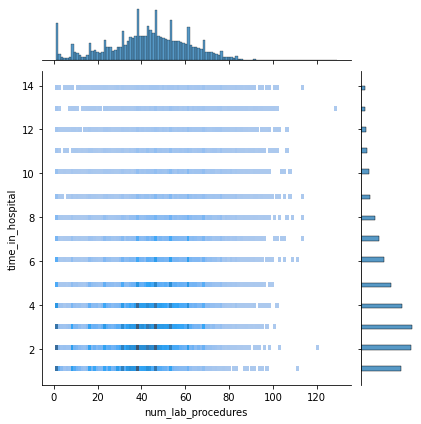

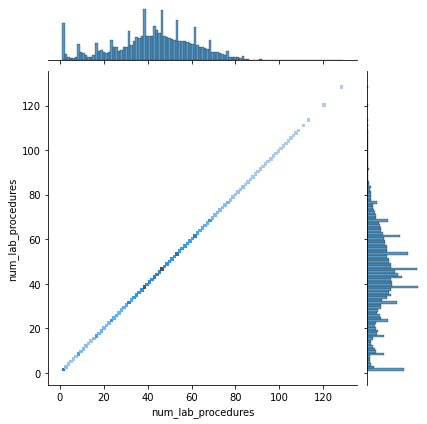

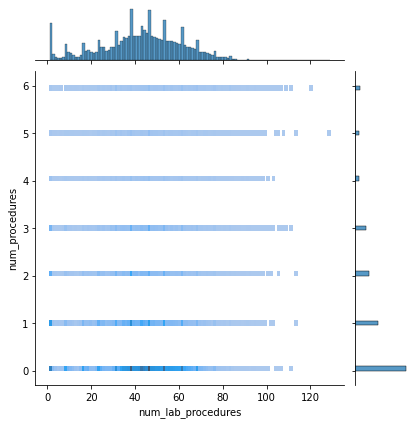

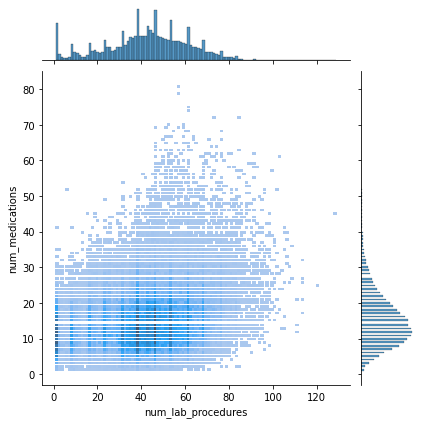

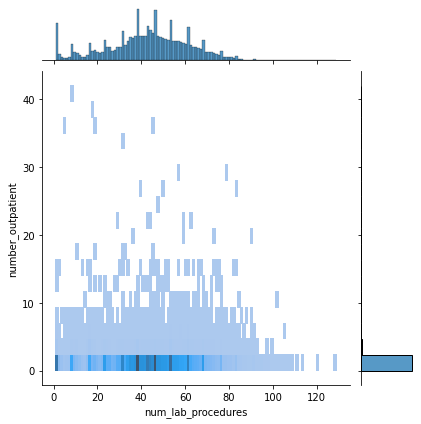

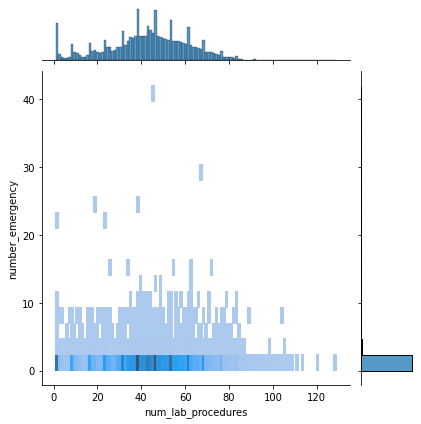

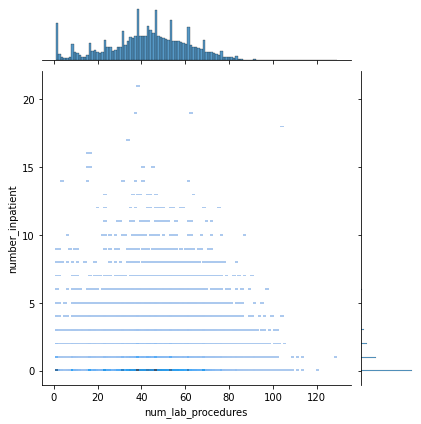

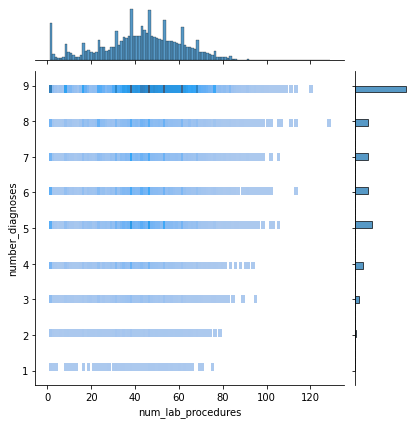

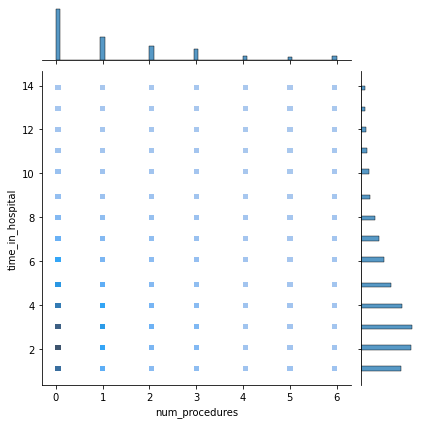

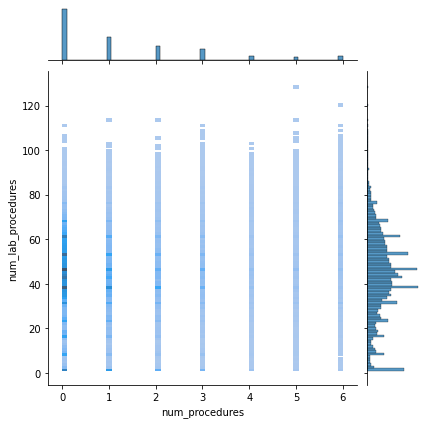

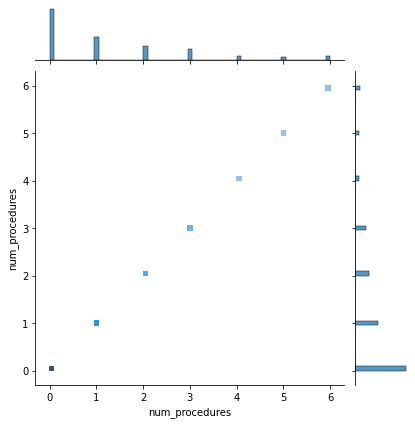

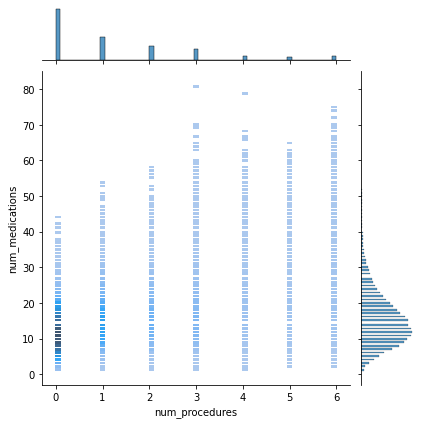

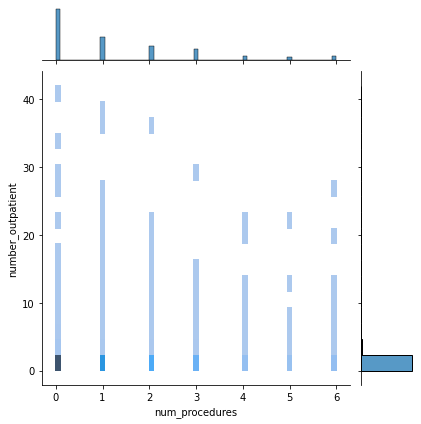

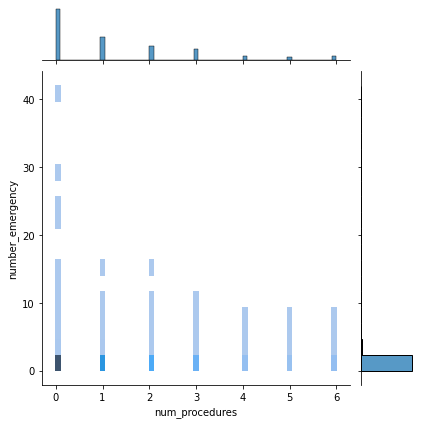

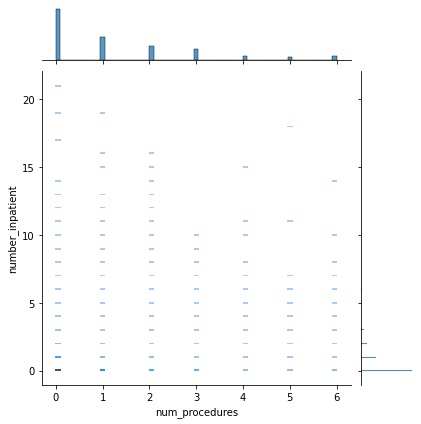

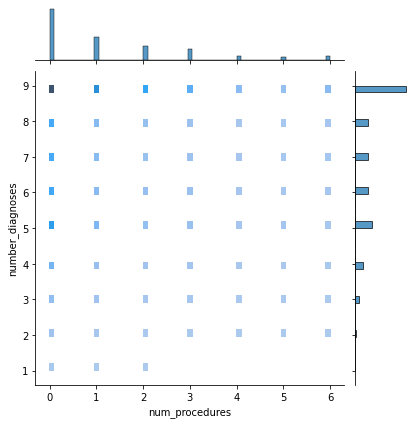

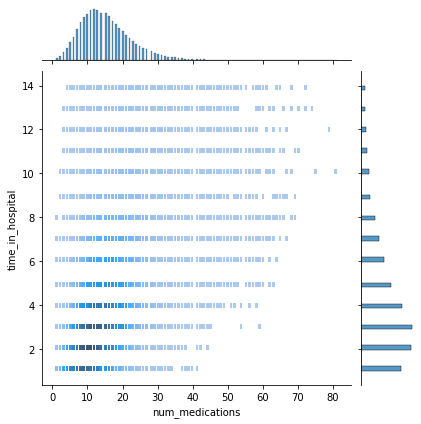

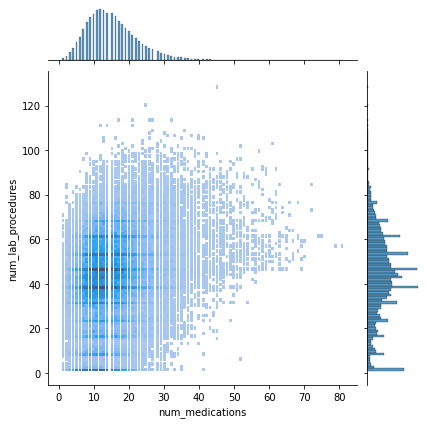

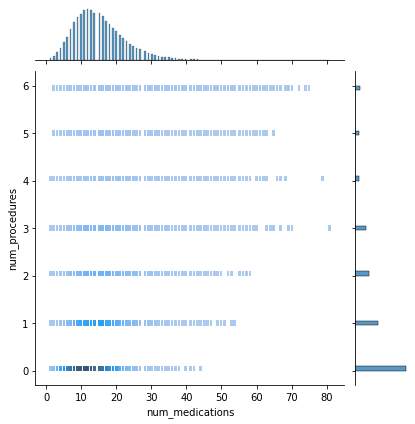

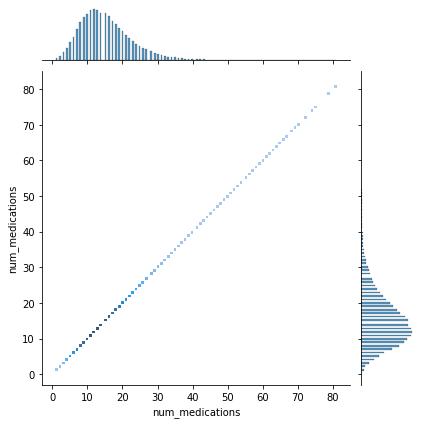

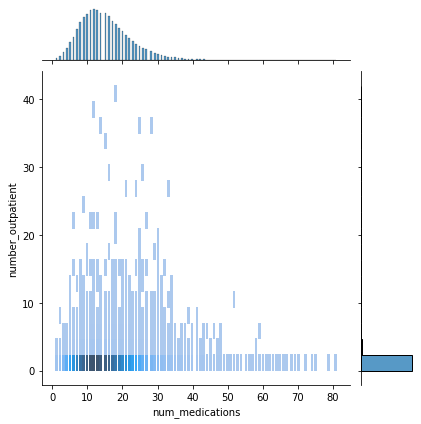

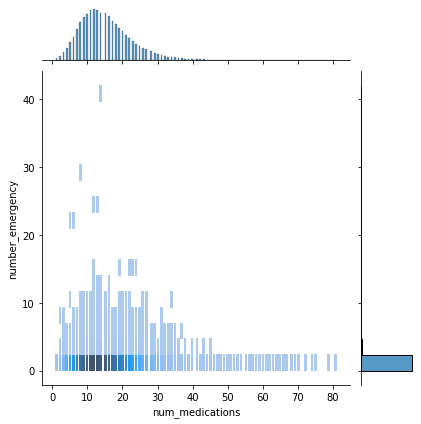

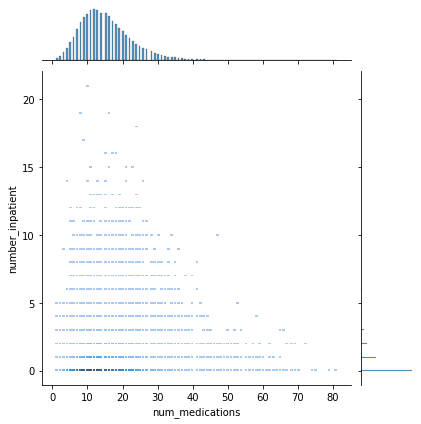

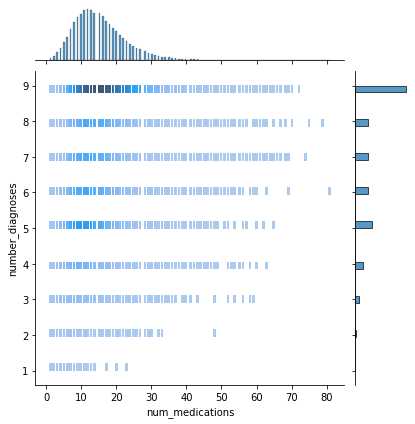

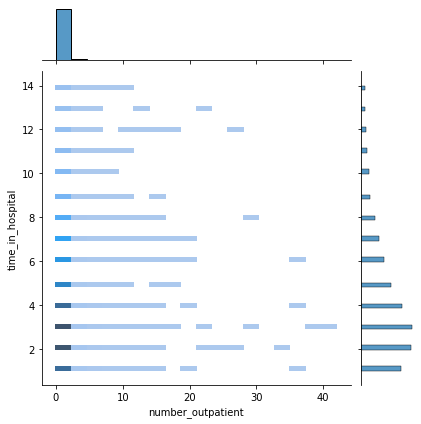

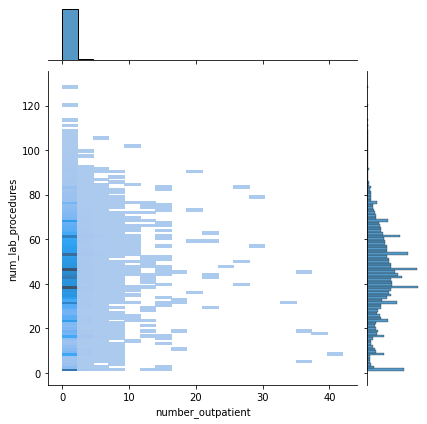

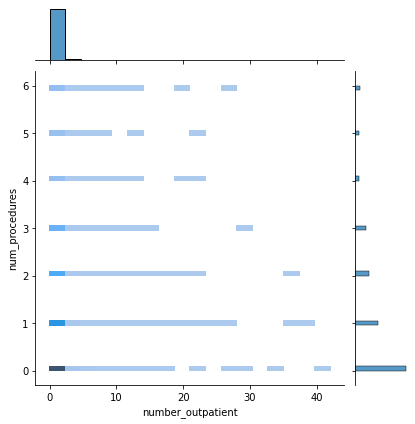

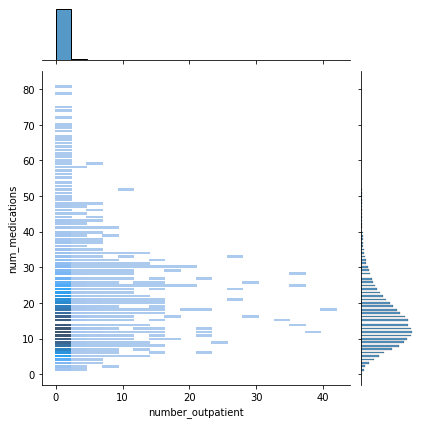

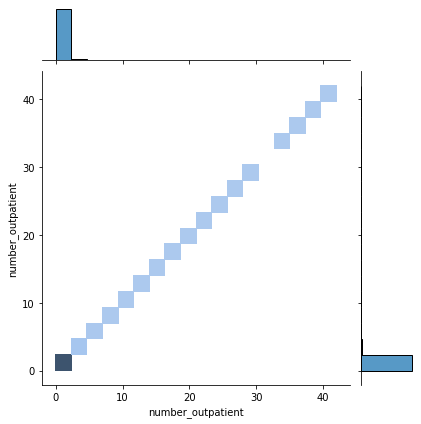

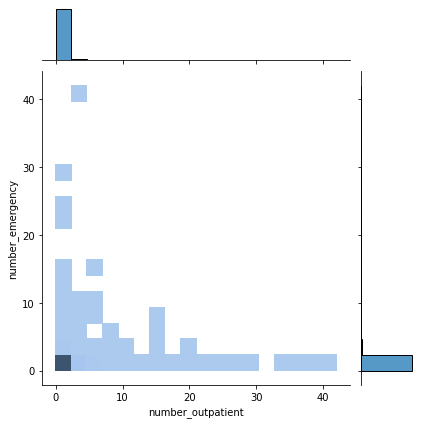

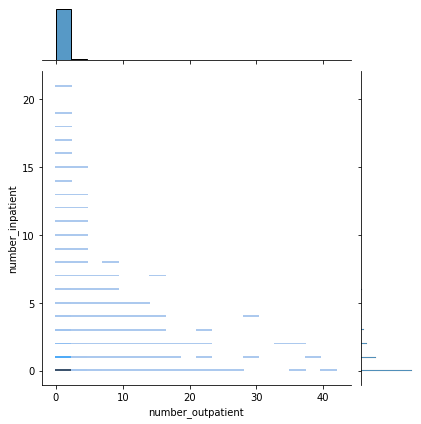

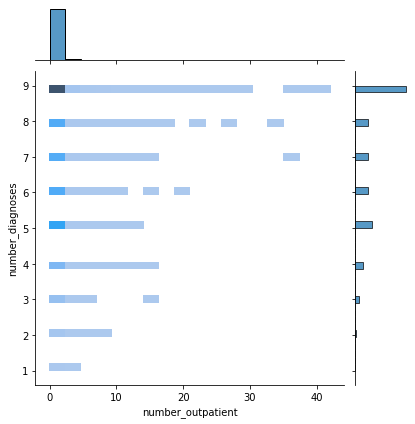

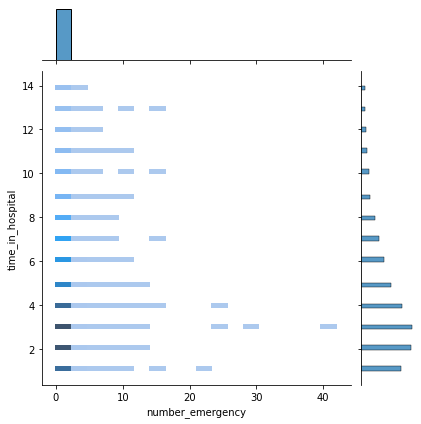

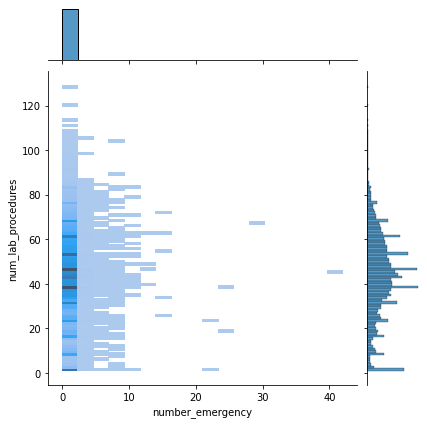

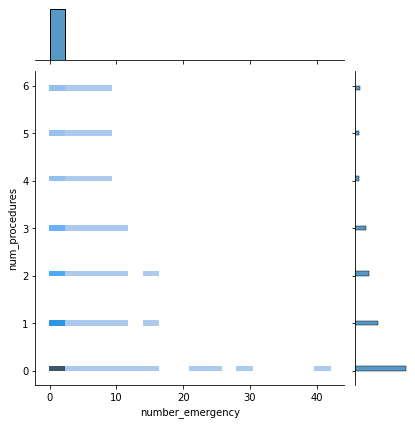

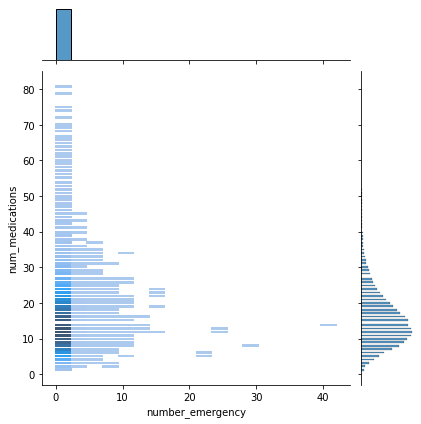

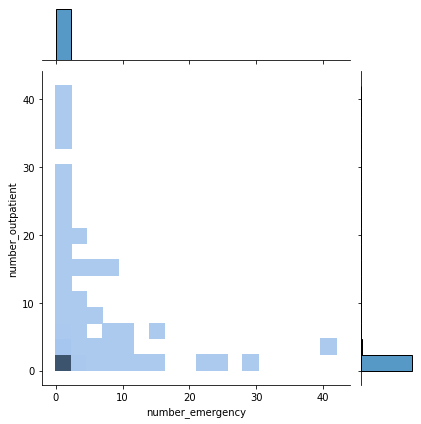

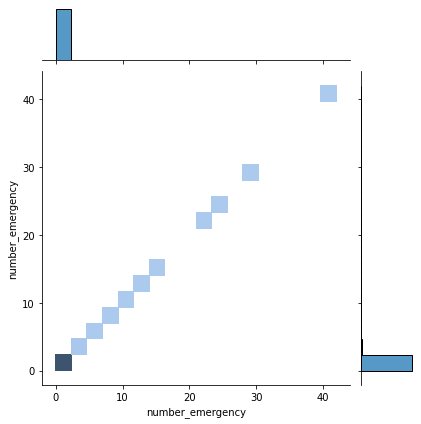

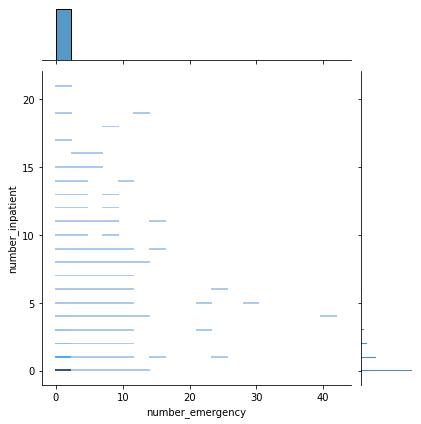

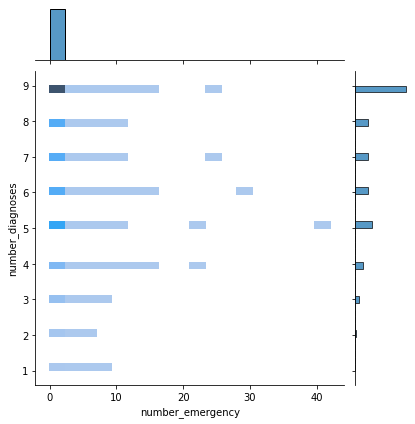

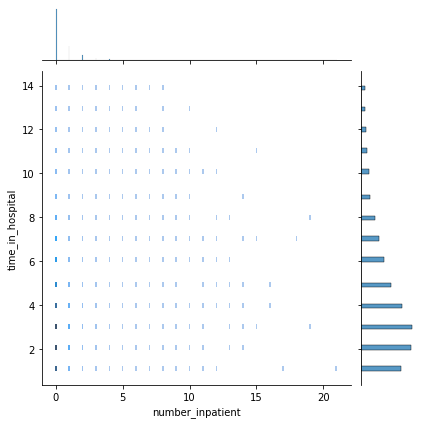

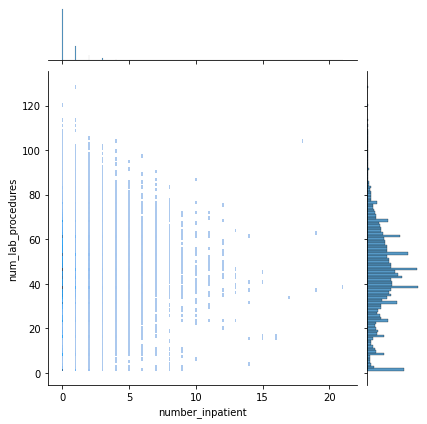

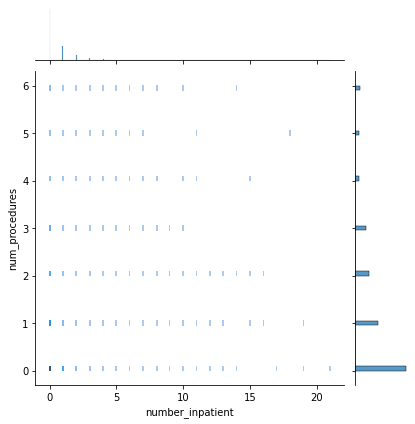

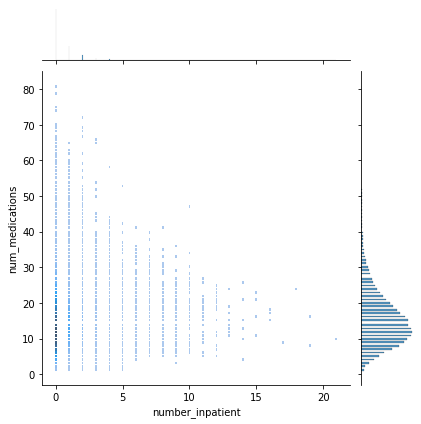

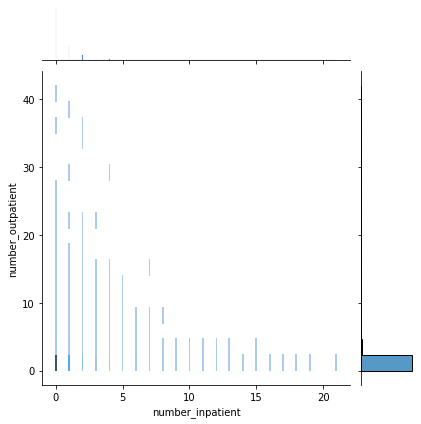

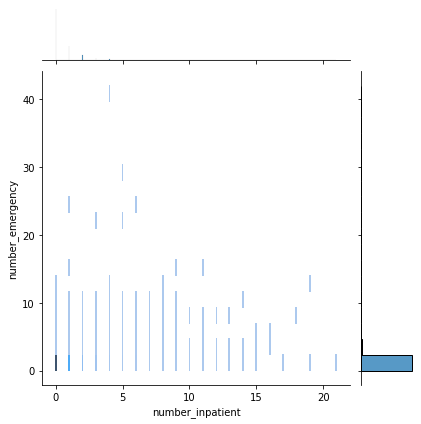

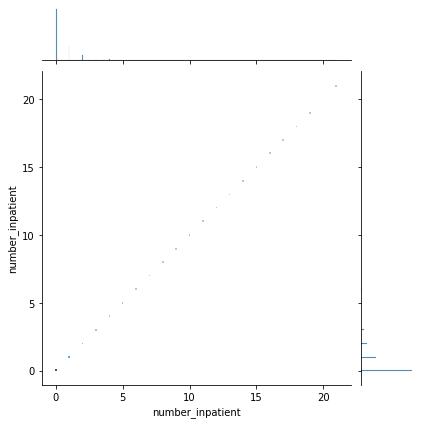

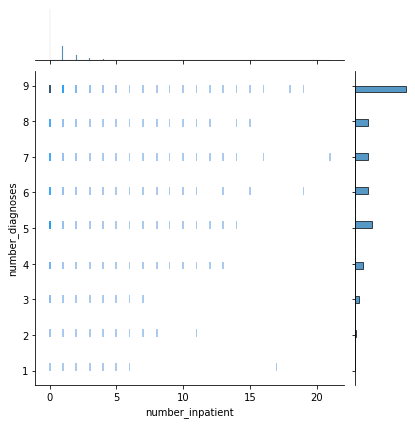

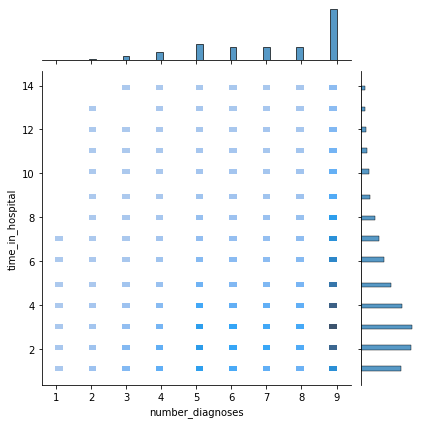

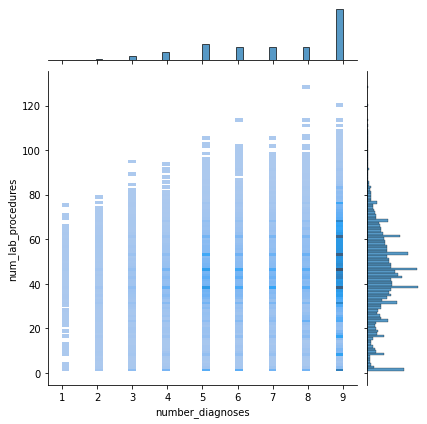

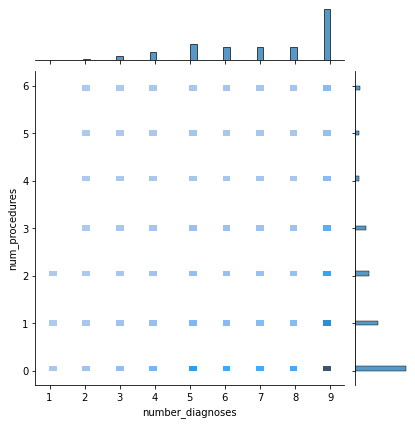

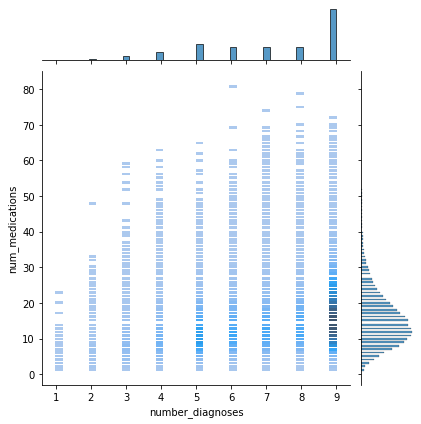

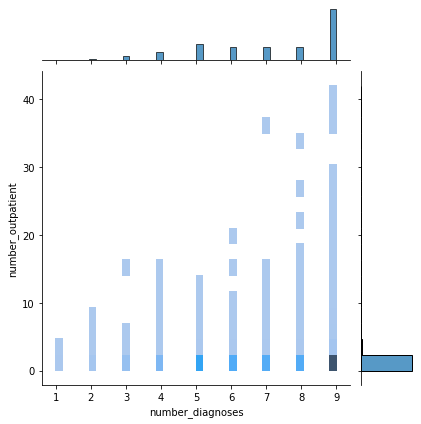

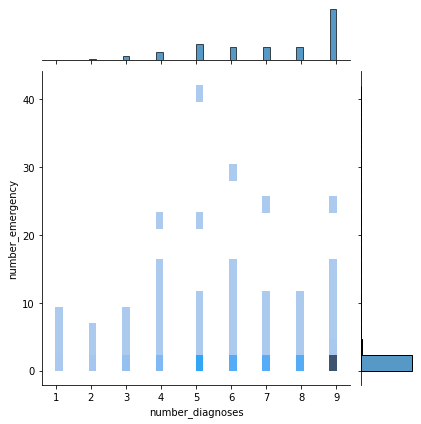

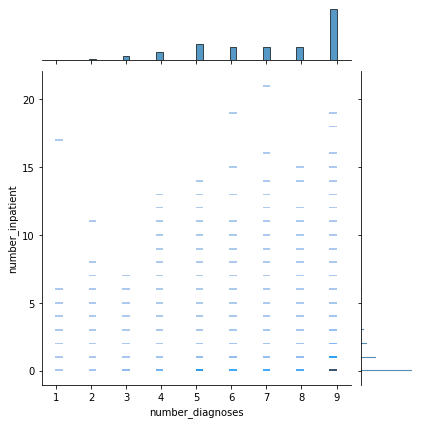

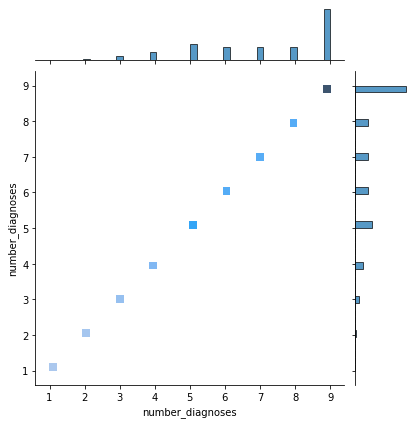

In [51]:
for col1 in regress_col:
    for col2 in regress_col:
#         if col1!=col2:
            sns.jointplot(x=col1, y=col2, data=X, kind='hist')
            plt.show()

Found two bimodalities:
    'num_lab_procedures' and 'number_diagnoses'
Let's cluster on those two features

In [117]:
len(X)//2

35618

In [131]:
y.sum()

37397

Classes are almost balanced

In [209]:
from sklearn.cluster import KMeans

features from EDA: 'time_in_hospital', 'number_diagnoses' and 'number_inpatient'

In [225]:
cluster = KMeans(n_clusters=2)
cluster.fit(X[['time_in_hospital']])
abs((cluster.predict(X[['time_in_hospital']]) - y).sum())

16435

In [226]:
cluster = KMeans(n_clusters=2)
cluster.fit(X[['number_diagnoses']])
abs((cluster.predict(X[['number_diagnoses']]) - y).sum())

7958

In [228]:
cluster = KMeans(n_clusters=2)
cluster.fit(X[['number_inpatient']])
abs((cluster.predict(X[['number_inpatient']]) - y).sum())

27491

In [229]:
cluster = KMeans(n_clusters=2)
cluster.fit(X[['num_lab_procedures']])
abs((cluster.predict(X[['num_lab_procedures']]) - y).sum())

7756

In [234]:
cluster = KMeans(n_clusters=2)
cluster.fit(X[['num_lab_procedures', 'number_diagnoses']])
abs((cluster.predict(X[['num_lab_procedures', 'number_diagnoses']]) - y).sum())

6175

feature 'num_lab_procedures' gave us pretty good results
feature 'number_diagnoses' is worth trying

In [240]:
best_features = ['num_lab_procedures', 'number_diagnoses']

In [11]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

(0.0, 0.1)

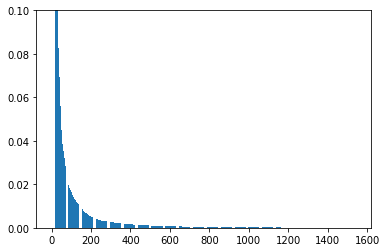

In [33]:
pca = PCA()
pca.fit(X)
intrinsic_dim = np.argmin(pca.explained_variance_ratio_.cumsum() <= 0.999)

pca = PCA(n_components=intrinsic_dim)
pca.fit(X)
plt.bar(range(intrinsic_dim), pca.explained_variance_)
plt.ylim(top=0.1)

In [18]:
intrinsic_dim

403

## PCA

In [18]:
pca = PCA(n_components=50)
pca.fit(X)

PCA(n_components=2)

In [19]:
X_pca = pd.DataFrame(pca.transform(X), index=X.index)

## Now lets use our labels for clustering

I can use 10% subset of all data for speed increase while retaning informativity.

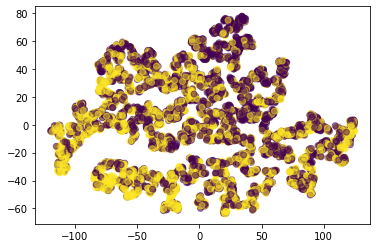

In [21]:
tsne = TSNE(learning_rate=500, n_jobs=-1)
tsne_features = tsne.fit_transform(X_pca[:7000])
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=y[:7000], alpha=0.5)

In [ ]:
X_true = X[]

## Correlation

In [55]:
corr_with_y = abs(X.corrwith(y)).sort_values(ascending=False)[:150]

In [48]:
corr_with_y.index

Index(['number_inpatient', 'number_diagnoses', 'discharge_disposition_id_11',
       'number_emergency', 'admission_source_id_7', 'number_outpatient',
       'admission_source_id_6', 'diag_1_428', 'diabetesMed_Yes',
       'diabetesMed_No',
       ...
       'diag_3_V10', 'diag_1_235', 'payer_code_WC', 'diag_1_182', 'diag_1_786',
       'diag_1_404', 'diag_2_197', 'gender_Female', 'diag_3_581',
       'gender_Male'],
      dtype='object', length=150)

In [12]:
top_corr_with_y = abs(X.corrwith(y)).sort_values(ascending=False)[:2]
top_corr_with_y.index

Index(['number_inpatient', 'number_diagnoses'], dtype='object')

In [13]:
X_corr = X[top_corr_with_y.index]

## Let's try clustering with every pair of dimensions

In [146]:
quality_list = []
dim_pair = []
for i in range(len(regress_col)):
    for j in range(len(regress_col)):
        cluster = KMeans(n_clusters=2, n_init=100)
        dim1 = X[regress_col[i]]
        dim2 = X[regress_col[j]]
        
        X_2 = pd.concat([dim1, dim2], axis=1)
        cluster.fit(X_2)
#         print(cluster.predict((dim1, dim2)))
        quality = abs((cluster.predict(X_2) - y).sum())
        quality_list.append(quality)
        dim_pair.append((regress_col[i], regress_col[j]))
        print(quality_list[-1], dim_pair[-1])

12877 ('time_in_hospital', 'time_in_hospital')
8433 ('time_in_hospital', 'num_lab_procedures')
10481 ('time_in_hospital', 'num_procedures')
16641 ('time_in_hospital', 'num_medications')
16644 ('time_in_hospital', 'number_outpatient')
16506 ('time_in_hospital', 'number_emergency')
17564 ('time_in_hospital', 'number_inpatient')
5283 ('time_in_hospital', 'number_diagnoses')
12027 ('num_lab_procedures', 'time_in_hospital')
4198 ('num_lab_procedures', 'num_lab_procedures')
16089 ('num_lab_procedures', 'num_procedures')
3086 ('num_lab_procedures', 'num_medications')
4985 ('num_lab_procedures', 'number_outpatient')
6930 ('num_lab_procedures', 'number_emergency')
27491 ('num_lab_procedures', 'number_inpatient')
6133 ('num_lab_procedures', 'number_diagnoses')
10481 ('num_procedures', 'time_in_hospital')
16089 ('num_procedures', 'num_lab_procedures')
22055 ('num_procedures', 'num_procedures')
18025 ('num_procedures', 'num_medications')
22056 ('num_procedures', 'number_outpatient')
22064 ('num_pr

In [118]:
clusterizations = pd.Series(quality_list, index=dim_pair)
clusterizations.sort_values()

(num_lab_procedures, num_medications)        3086
(number_emergency, num_lab_procedures)       3142
(num_lab_procedures, num_lab_procedures)     4198
(number_diagnoses, num_medications)          5391
(num_medications, num_lab_procedures)        6644
                                            ...  
(number_emergency, number_inpatient)        31018
(number_inpatient, number_emergency)        31018
(number_outpatient, number_emergency)       33452
(number_outpatient, number_outpatient)      34911
(number_emergency, number_emergency)        35330
Length: 64, dtype: int64

In [166]:
best_features = list(clusterizations.sort_values().index[0])
cluster.fit(X[best_features])

KMeans(n_clusters=2)

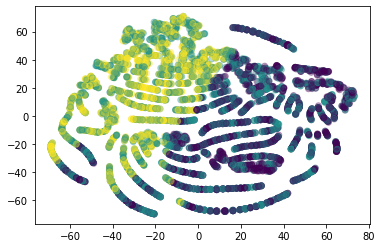

In [137]:
tsne = TSNE(learning_rate=50, n_jobs=-1)
tsne_features = tsne.fit_transform(X[best_features].iloc[:7000])
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=cluster.predict(X[best_features][:7000])-y[:7000], alpha=0.333)

## Clustering with two correlated features with label

In [164]:
cluster2 = KMeans(n_clusters=2, n_init=30, max_iter=1000)
cluster2.fit(X_corr)

KMeans(max_iter=1000, n_clusters=2, n_init=30)

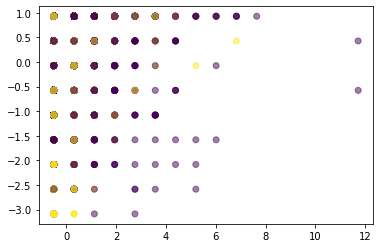

In [162]:
plt.scatter(X_corr.iloc[:7000, 0],X_corr.iloc[:7000, 1] , c=y[:7000], alpha=0.5)

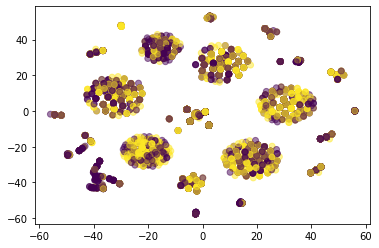

In [163]:
tsne = TSNE(learning_rate=50, n_jobs=-1)
tsne_features = tsne.fit_transform(X_corr.iloc[:7000])
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=y[:7000], alpha=0.5)

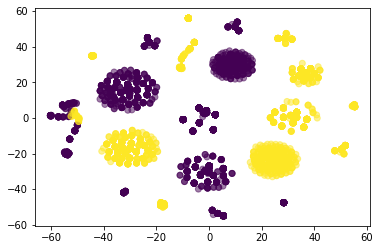

In [166]:
tsne = TSNE(learning_rate=50, n_jobs=-1)
tsne_features = tsne.fit_transform(X_corr.iloc[:7000])
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.scatter(xs, ys, c=cluster2.predict(X_corr[:7000]), alpha=0.5)

In [165]:
(cluster2.predict(X_corr[:7000]) == y[:7000]).sum()

3895

In [ ]:
#TODO NMF

## Open and transform test data

In [235]:
test = pd.read_csv('TEST.csv')

In [236]:
test[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']] = test[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']].astype('object')

In [237]:
test = pd.get_dummies(test, drop_first=False)

In [238]:
X, test = X.align(test, join='left', axis=1)

In [239]:
test[regress_col] = scaler.transform(test[regress_col])

In [143]:
# test = test[top_corr_with_y.index]

In [ ]:
# test = test[['num_lab_procedures']]

In [241]:
test = test[best_features]

In [242]:
pred = cluster.predict(test)

## Write result to a file

In [244]:
import csv
with open('cluster_5.csv', 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['index', 'target'])
    for i, class_ in enumerate(pred): 
        writer.writerow([test.index[i],class_]) #class_ or 1-class for different clusters corresponding to y

Results

kaggle gave 53.5% acc for clustering based on 'num_lab_procedures'
             and 62.7% acc for clustering based on 'number_inpatient', 'number_diagnoses'
Overall I could increase prediction of a patient returning or not by 12.7% corrected by class.
It would help tremendously to the hospitals by helping them planning occupancy rate. And it might help doctors to plan patient treatment or improving medical procedures.